In [4]:
!pip install imblearn
!pip install -U yellowbrick
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport

     |████████████████████████████████| 266kB 2.5MB/s eta 0:00:01


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df = pd.read_pickle('sf_transformed.pkl')

In [6]:
y = df.arrest_made
X = df[['subject_age','contraband_found','search_conducted','subject_race', 'gender']]

//
Address class imbalance
//

In [7]:
target_count = y.value_counts()

In [8]:
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count), 4)*100}')

Class 0: 37234
Class 1: 5792
Proportion: 6.43 : 1
Percentage of Majority Class: 86.53999999999999


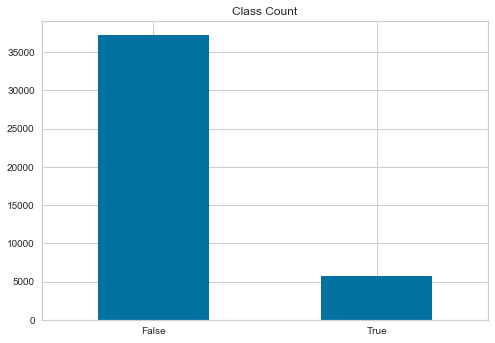

In [9]:
target_count.plot(kind='bar', title='Class Count', rot=0);

In [10]:
y=y.astype('int')
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
Counter(y_res)

Counter({1: 37234, 0: 37234})

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf = LogisticRegression(random_state=42,solver='liblinear',max_iter=1000)

In [13]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [14]:
clf.score(X_test, y_test)

0.8645679273188253

In [ ]:
visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()